In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf

In [24]:
df1 = pd.read_csv('./SR3_scan_1/dump_1210191954.csv')
df2 = pd.read_csv('./SR3_scan_1/dump_1210193872.csv')
df3 = pd.read_csv('./SR3_scan_1/dump_1210195716.csv')
df4 = pd.read_csv('./SR3_scan_1/dump_1210197571.csv')
df5 = pd.read_csv('./SR3_scan_1/dump_1210198134.csv')

In [25]:
DF = pd.concat([df1,df2,df3,df4,df5]).reset_index(drop=True)
tdf = pd.read_csv('./SR3_scan_1/SR3_temp.csv',names=['temp'])
tdf['time'] = np.linspace(DF['time'].min(),DF['time'].max(),len(tdf['temp']))

Text(0, 0.5, '$A_2\\, /\\, A_0$')

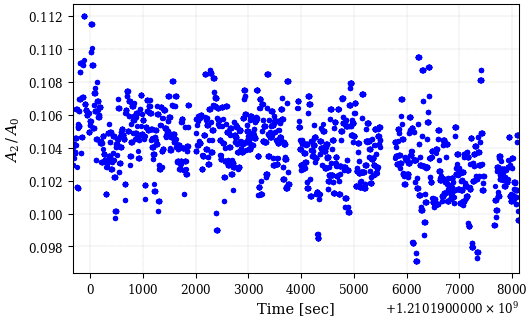

In [26]:
fig1 = plt.figure()
plt.plot(DF['time'],DF['m'],'.')
plt.xlabel('Time [sec]')
plt.ylabel(r'$A_2\, /\, A_0$')

Text(0, 0.5, 'SR3 Heater Element Temperature [$^{\\circ}$C]')

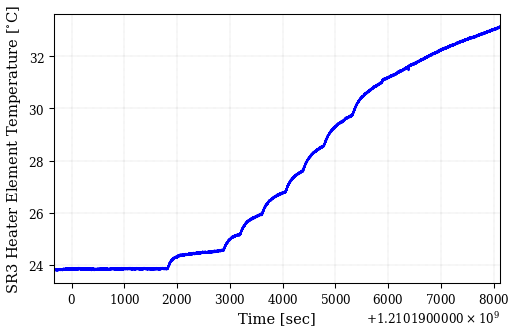

In [27]:
fig2 = plt.figure()
plt.plot(tdf['time'],tdf['temp'])
plt.xlabel('Time [sec]')
plt.ylabel(r'SR3 Heater Element Temperature [$^{\circ}$C]')

In [28]:
bins = np.linspace(DF['time'].min(),DF['time'].max(),len(DF))
dig_ind = np.digitize(tdf['time'].values,bins)

tdf2 = pd.DataFrame(tdf['temp'])
tdf2['time'] = tdf['time'].values[dig_ind]
tdf3 = tdf2.groupby('time').mean().reset_index()

Text(0, 0.5, '$A_2\\, /\\, A_0$')

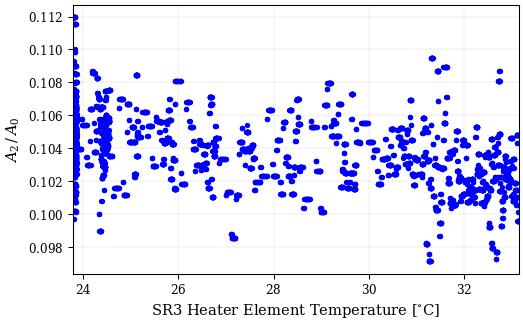

In [29]:
fig3 = plt.figure()
plt.plot(tdf3['temp'],DF['m'],'.')
plt.xlabel(r'SR3 Heater Element Temperature [$^{\circ}$C]')
plt.ylabel(r'$A_2\, /\, A_0$')

In [30]:
df6 = pd.read_csv('./SR3_scan_2/dump_1210202693.csv')
df7 = pd.read_csv('./SR3_scan_2/dump_1210204132.csv')

In [31]:
DF2 = pd.concat([df6,df7]).reset_index(drop=True)
tdf4 = pd.read_csv('./SR3_scan_2/sr3_temp_1210204123.csv')

In [32]:
bins = np.linspace(DF2['time'].min(),DF2['time'].max(),len(DF2))
dig_ind = np.digitize(tdf4['time'].values,bins)

tdf5 = pd.DataFrame(tdf4['temp'])
tdf5['time'] = tdf4['time'].values[dig_ind]
tdf5 = tdf5.groupby('time').mean().reset_index()

Text(0, 0.5, '$A_2\\, /\\, A_0$')

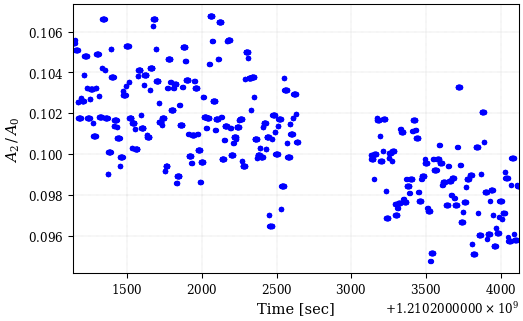

In [33]:
fig4 = plt.figure()
plt.plot(DF2['time'],DF2['m'],'.')
# plt.plot(DF['time'],DF['m'],'.')
plt.xlabel('Time [sec]')
plt.ylabel(r'$A_2\, /\, A_0$')

Text(0, 0.5, 'SR3 Heater Element Temperature [$^{\\circ}$C]')

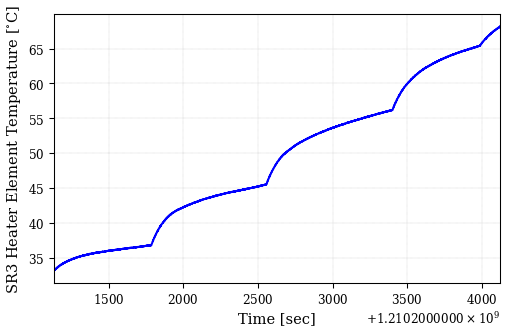

In [34]:
fig5 = plt.figure()
plt.plot(tdf4['time'],tdf4['temp'])
plt.xlabel('Time [sec]')
plt.ylabel(r'SR3 Heater Element Temperature [$^{\circ}$C]')

Text(0, 0.5, '$A_2\\, /\\, A_0$')

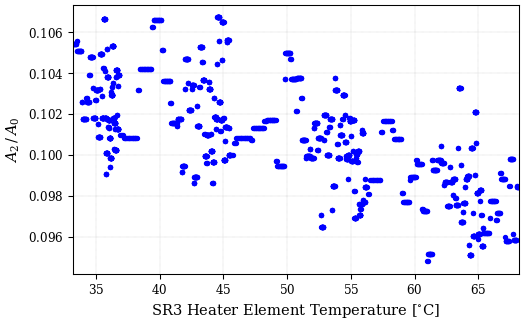

In [35]:
fig6 = plt.figure()
plt.plot(tdf5['temp'],DF2['m'],'.')
# plt.plot(tdf3['temp'],DF['m'],'.')
plt.xlabel(r'SR3 Heater Element Temperature [$^{\circ}$C]')
plt.ylabel(r'$A_2\, /\, A_0$')

In [36]:
# t1 = tdf['time'].to_numpy()
# t1 -= t1[0]

# t2 = tdf4['time'].to_numpy()
# t2 -= t2[0]

# t3 = DF['time'].to_numpy()
# t3 -= t3[0]

# t4 = DF2['time'].to_numpy()
# t4 -= t4[0]

/home/alexei/git/alexei_thesis/notebooks/commissioning/SR3_heater_scans/../SR3_heater_scan_GPS_time.png
/home/alexei/git/alexei_thesis/notebooks/commissioning/SR3_heater_scans/../SR3_heater_scan_GPS_time.pdf


0

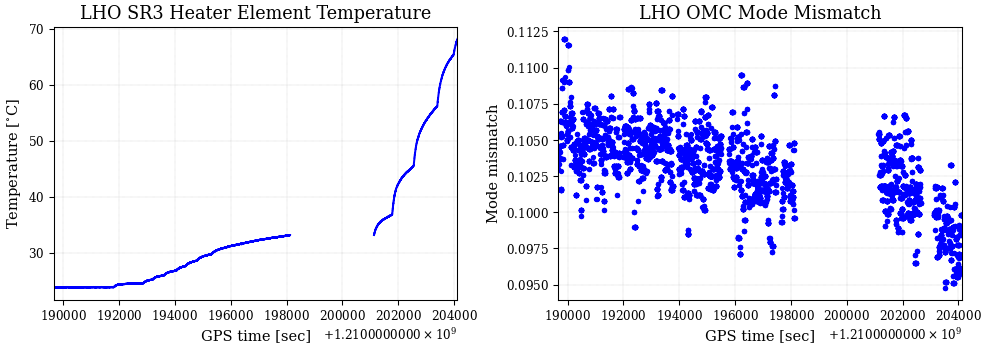

In [37]:
fig, ax = mpf.subplots(1,2, figscale=mpf.thesis_figsize(), wspace=0.25)
_a = ax[0]
_a.plot(tdf['time'],tdf['temp'])
_a.plot(tdf4['time'],tdf4['temp'], c='b')
_a.set_xlabel('GPS time [sec]')
_a.set_ylabel(r'Temperature [$^{\circ}$C]')
_a.set_title('LHO SR3 Heater Element Temperature')

_a = ax[1]
_a.plot(DF['time'],DF['m'],'.')
_a.plot(DF2['time'],DF2['m'],'.', c='b')
_a.set_xlabel('GPS time [sec]')
_a.set_ylabel(r'Mode mismatch')
_a.set_title('LHO OMC Mode Mismatch')
mpf.thesis_savefig(fig, '../SR3_heater_scan_GPS_time')

/home/alexei/git/alexei_thesis/notebooks/commissioning/SR3_heater_scans/../SR3_heater_scan_mismatch_vs_temperature.png
/home/alexei/git/alexei_thesis/notebooks/commissioning/SR3_heater_scans/../SR3_heater_scan_mismatch_vs_temperature.pdf


0

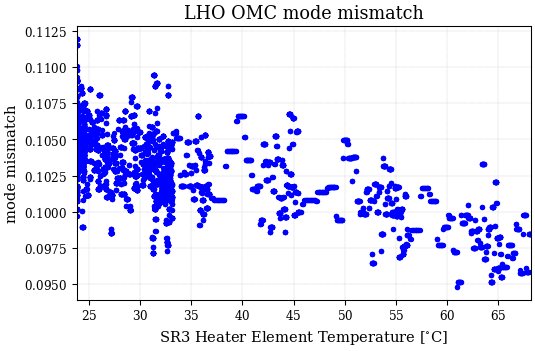

In [38]:
fig, ax = mpf.subplots(1,1, figscale=mpf.thesis_figsize())
_a = ax[0]
_a.plot(tdf3['temp'],DF['m'],'.', c='b')
_a.plot(tdf5['temp'],DF2['m'],'.', c='b')
_a.set_xlabel(r'SR3 Heater Element Temperature [$^{\circ}$C]')
_a.set_ylabel(r'mode mismatch')
_a.set_title(r'LHO OMC mode mismatch')
mpf.thesis_savefig(fig, '../SR3_heater_scan_mismatch_vs_temperature')